In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
!ls
%cd /content/gdrive/MyDrive/Data Augmentation-XrayImg

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data
/content/gdrive/MyDrive/Data Augmentation-XrayImg


# 0 .Set up

In [2]:
!nvidia-smi

Tue Mar 16 15:28:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch 
print(torch.__version__)

1.8.0+cu101


In [4]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/{cu_version}/{torch_version}/index.html
     |████████████████████████████████| 235kB 16.3MB/s 
     |████████████████████████████████| 194kB 12.8MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.2.7-cp37-cp37m-linux_x86_64.whl size=21809348 sha256=30dd7cf8dc9803107173769fd3b87363d10e81e9b41adf7eeb6e7995b8ccbe7a
  Stored in directory: /root/.cache/pip/wheels/d9/eb/f8/766019b8f36d3a7b655618fc46d65bf52801906b30185a4624
Successfully built mmcv-full


In [5]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16432 (delta 0), reused 0 (delta 0), pack-reused 16427
Receiving objects: 100% (16432/16432), 19.64 MiB | 10.60 MiB/s, done.
Resolving deltas: 100% (11376/11376), done.
Checking out files: 100% (942/942), done.


In [6]:
%cd mmdetection

/content/gdrive/MyDrive/Data Augmentation-XrayImg/mmdetection


In [7]:
!pip install -r requirements/build.txt


In [8]:
!pip install -v -e .

Created temporary directory: /tmp/pip-ephem-wheel-cache-qdb3tf72
Created temporary directory: /tmp/pip-req-tracker-nsx5gc1a
Created requirements tracker '/tmp/pip-req-tracker-nsx5gc1a'
Created temporary directory: /tmp/pip-install-ngx611qz
Obtaining file:///content/gdrive/My%20Drive/Data%20Augmentation-XrayImg/mmdetection
  Added file:///content/gdrive/My%20Drive/Data%20Augmentation-XrayImg/mmdetection to build tracker '/tmp/pip-req-tracker-nsx5gc1a'
    Running setup.py (path:/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection/setup.py) egg_info for package from file:///content/gdrive/My%20Drive/Data%20Augmentation-XrayImg/mmdetection
    Running command python setup.py egg_info
    running egg_info
    creating mmdet.egg-info
    writing mmdet.egg-info/PKG-INFO
    writing dependency_links to mmdet.egg-info/dependency_links.txt
    writing requirements to mmdet.egg-info/requires.txt
    writing top-level names to mmdet.egg-info/top_level.txt
    writing manifest file 'mmde

In [9]:
!mkdir checkpoints/ 
%cd checkpoints/


/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection/checkpoints


In [10]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=ccfe40dbf5fc328557c88c0134995ef4ca81f6cbc2db34707e15491026d2ec36
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [11]:
import wget
wget.download('http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth')

'faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [12]:
%cd ..

/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection


# 1. Inference with existing models

In [13]:
from mmdet.apis import init_detector, inference_detector
import matplotlib.pyplot as plt
import cv2


Use load_from_local loader


/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


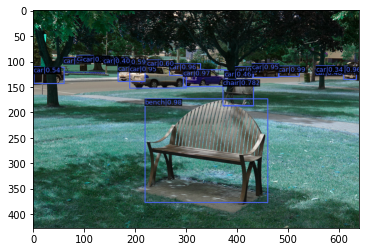

In [14]:
# demo img
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
device = 'cuda:0'
# init a detector
model = init_detector(config_file, checkpoint_file, device=device)
# inference the demo image
path='./demo/demo.jpg'
result=inference_detector(model, path)
img=cv2.imread(path)
# visualize the results in a new window
plt.figure(figsize=(20, 20))
plt.imshow(model.show_result(img, result))
plt.show()


In [42]:
!wget -P ./checkpoints/ http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

--2021-03-16 17:30:31--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177867103 (170M) [application/octet-stream]
Saving to: ‘./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’

mask_rcnn_r50_caffe 100%[===================>] 169.63M  7.93MB/s    in 22s     

2021-03-16 17:30:54 (7.81 MB/s) - ‘./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth’ saved [177867103/177867103]



# 2. Train with customized datasets

In [18]:
!unzip ../balloon_dataset.zip -d ../

Archive:  ../balloon_dataset.zip
   creating: ../balloon/
   creating: ../balloon/train/
  inflating: ../balloon/train/via_region_data.json  
   creating: ../__MACOSX/
   creating: ../__MACOSX/balloon/
   creating: ../__MACOSX/balloon/train/
  inflating: ../__MACOSX/balloon/train/._via_region_data.json  
  inflating: ../balloon/train/53500107_d24b11b3c2_b.jpg  
  inflating: ../__MACOSX/balloon/train/._53500107_d24b11b3c2_b.jpg  
  inflating: ../balloon/train/120853323_d4788431b9_b.jpg  
  inflating: ../__MACOSX/balloon/train/._120853323_d4788431b9_b.jpg  
  inflating: ../balloon/train/126700562_8e27720147_b.jpg  
  inflating: ../__MACOSX/balloon/train/._126700562_8e27720147_b.jpg  
  inflating: ../balloon/train/145053828_e0e748717c_b.jpg  
  inflating: ../__MACOSX/balloon/train/._145053828_e0e748717c_b.jpg  
  inflating: ../balloon/train/154446334_5d41cd1375_b.jpg  
  inflating: ../__MACOSX/balloon/train/._154446334_5d41cd1375_b.jpg  
  inflating: ../balloon/train/155815494_800fc9aa32_

In [19]:
import os.path as osp

def convert_balloon_to_coco(ann_file, out_file, image_prefix):
    data_infos = mmcv.load(ann_file)

    annotations = []
    images = []
    obj_count = 0
    for idx, v in enumerate(mmcv.track_iter_progress(data_infos.values())):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(dict(
            id=idx,
            file_name=filename,
            height=height,
            width=width))

        bboxes = []
        labels = []
        masks = []
        for _, obj in v['regions'].items():
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj['all_points_x']
            py = obj['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (
                min(px), min(py), max(px), max(py))


            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=[poly],
                iscrowd=0)
            annotations.append(data_anno)
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id':0, 'name': 'balloon'}])
    mmcv.dump(coco_format_json, out_file)

In [24]:
import mmcv

train_ann_file='../balloon/train/via_region_data.json'
train_out_file='../train/annotation_coco.json'
train_image_prefix='../balloon/train/'

val_ann_file='../balloon/val/via_region_data.json'
val_out_file='../balloon/val/annotation_coco.json'
val_image_prefix='../balloon/val/'

convert_balloon_to_coco(train_ann_file, train_out_file, train_image_prefix)
convert_balloon_to_coco(val_ann_file, val_out_file, val_image_prefix)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 32.0 task/s, elapsed: 2s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 13/13, 30.6 task/s, elapsed: 0s, ETA:     0s


In [31]:
!ls

balloon      docker    mmdet	       README_zh-CN.md	 setup.cfg
checkpoints  docs      mmdet.egg-info  requirements	 setup.py
configs      LICENSE   pytest.ini      requirements.txt  tests
demo	     __MACOSX  README.md       resources	 tools


In [43]:
# TRAIN
!python3 ./tools/train.py ../train_balloon.py

2021-03-16 17:31:08,764 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, Feb 20 2021, 21:17:23) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.8.0+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.7.0 (Git Hash 7aed236906b1f7a05c0917e5257a1af05e9ff683)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70
  - CuDNN 7.6.3
  - Magma 2.5.2
  - Build settings: BLAS_INFO

In [49]:
#TEST
!python3 ./tools/test.py ../train_balloon.py ./work_dirs/train_balloon/latest.pth --eval bbox segm

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Use load_from_local loader
[>>] 13/13, 5.6 task/s, elapsed: 2s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.01s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.725
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.828
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.812
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.063
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.481
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.817
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.772
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   a

Use load_from_local loader


/content/gdrive/My Drive/Data Augmentation-XrayImg/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


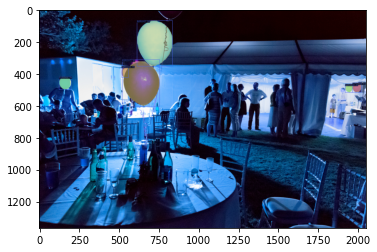

In [53]:
# demo img
config_file = '../train_balloon.py'
checkpoint_file = './work_dirs/train_balloon/latest.pth'
device = 'cuda:0'
# init a detector
model = init_detector(config_file, checkpoint_file, device=device)
# inference the demo image
path='../balloon/val/14898532020_ba6199dd22_k.jpg'
result=inference_detector(model, path)
img=cv2.imread(path)
# visualize the results in a new window
plt.imshow(model.show_result(img, result))
plt.show()


In [ ]:
# DONE